In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('dataframe_.csv')
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [47]:
df.shape

(1697, 2)

In [4]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1697 non-null   float64
 1   output  1697 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [22]:
df.corr()

,input,output
input,1.000000,0.511776
output,0.511776,1.000000


In [5]:
df.isnull()

,input,output
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1692,False,False
1693,False,False
1694,False,False
1695,False,False


In [8]:
df.isnull().sum()

input     1
output    1
dtype: int64

#### Replacing missing Values

In [9]:
input_mean=df['input'].mean()
input_mean

1.159932645006416

In [10]:
df['input'].fillna(value=input_mean, inplace=True)

In [12]:
output_mean=df['output'].mean()
output_mean

-34.08801719326943

In [13]:
df['output'].fillna(value=output_mean, inplace=True)

In [14]:
df.isnull().sum()

input     0
output    0
dtype: int64

In [17]:
X = df['input']
Y = df['output']

##### From below plot we can see outliers 

Text(0, 0.5, 'output')

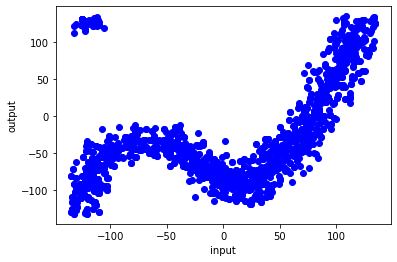

In [18]:
plt.plot(X,Y,'bo')
plt.xlabel('input')
plt.ylabel('output')

<AxesSubplot:>

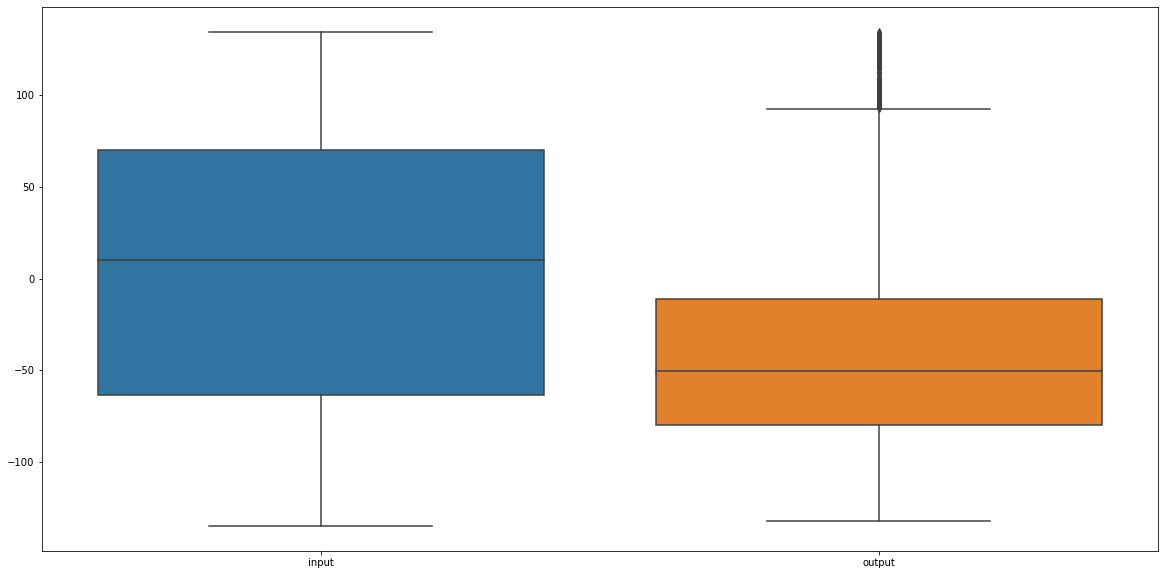

In [19]:
plot=plt.gcf()
plot.set_size_inches(20,10)
sns.boxplot(data=df)

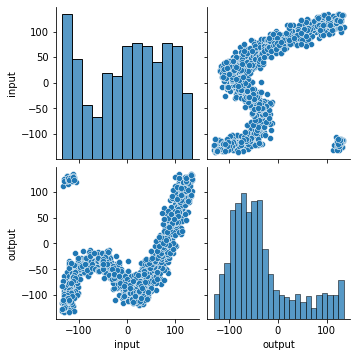

In [20]:
sns.pairplot(df)

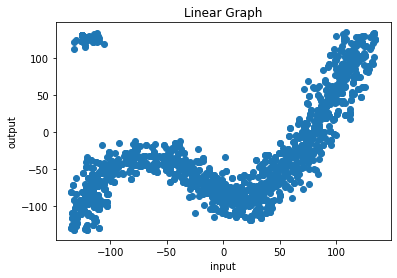

In [28]:
plt.title("Linear Graph")
plt.scatter(df['input'], df['output'])
plt.xlabel("input")
plt.ylabel("output")
plt.show()

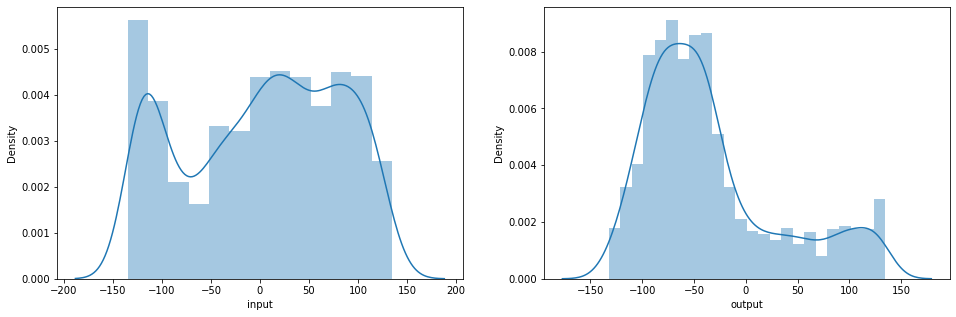

In [29]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['input'])
plt.subplot(1,2,2)
sns.distplot(df['output'])
plt.show()

#### Outlier detection

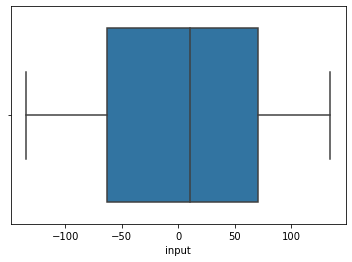

In [35]:
s1 = sns.boxplot(df['input'], showfliers=True, )
plt.show()

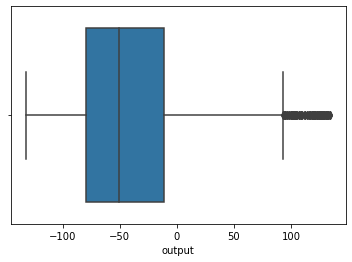

In [36]:
s2 = sns.boxplot(df['output'], showfliers=True, )
plt.show()

In [38]:
q1 = np.percentile(df["output"],25)
q3 = np.percentile(df["output"],75)
iqr = q3-q1
iqr

69.02676665

In [39]:
upper = q3+1.5*iqr
lower = q1-1.5*iqr
lower, upper

(-183.56691662499998, 92.54014997499999)

In [40]:
df[(df["output"]>upper) | (df["output"]<lower)].shape[0]

144

In [41]:
df.shape[0]

1697

#### Outlier Treatment & Removal

In [73]:
df_new = df[(df["output"]<upper) & (df["output"]>lower)]
df_new

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


Text(0.5, 1.0, 'Histogram for Customer Loyalty Before Removal')

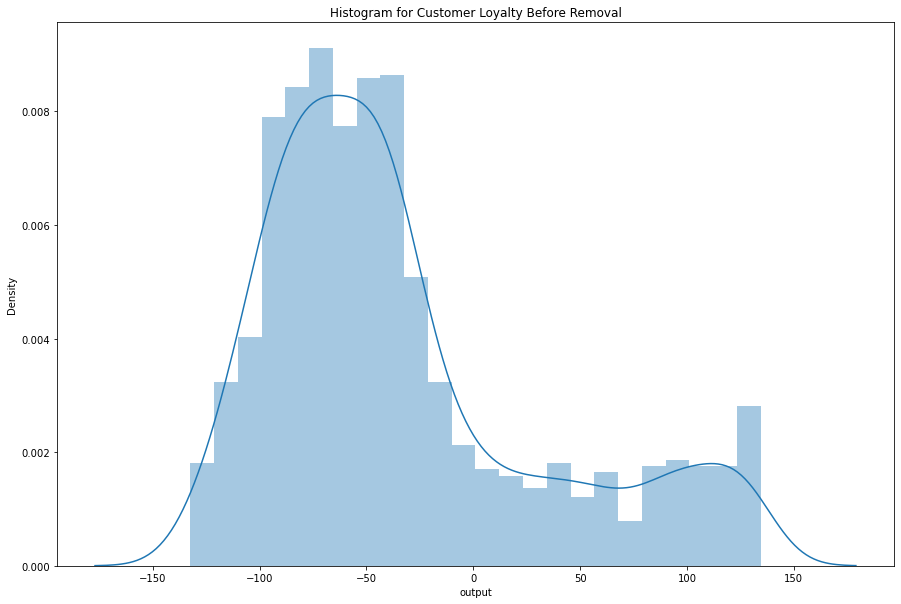

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.distplot(df["output"]);
plt.title('Histogram for Customer Loyalty Before Removal')

Text(0.5, 1.0, 'Histogram for Customer Loyalty After Removal')

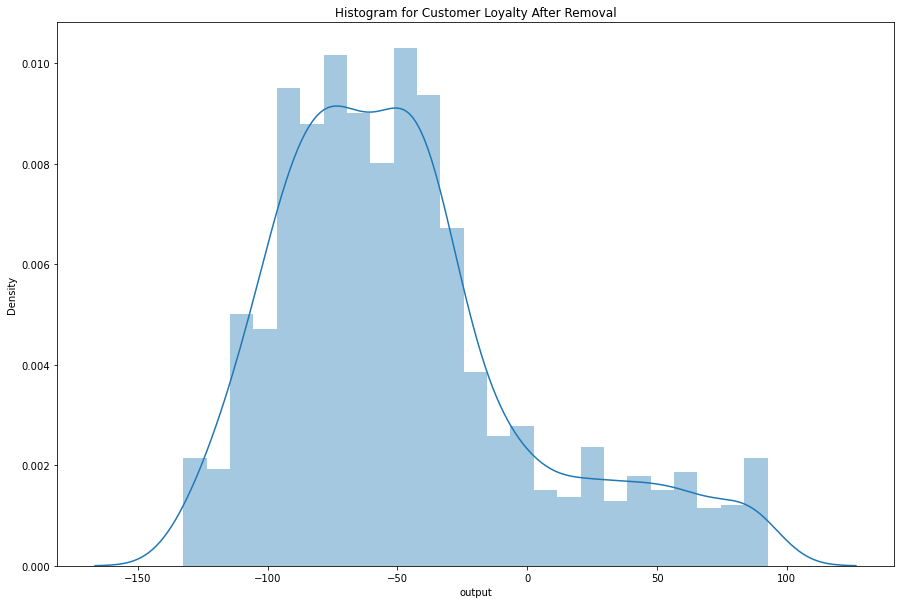

In [75]:
plt.figure(figsize=(15,10))
sns.distplot(df_new["output"]);
plt.title('Histogram for Customer Loyalty After Removal')

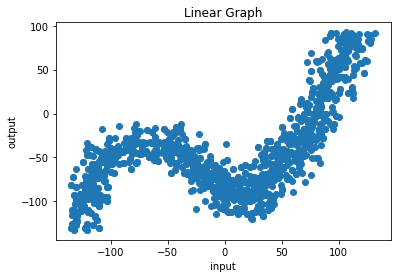

In [76]:
plt.title("Linear Graph")
plt.scatter(df_new['input'], new_dataset['output'])
plt.xlabel("input")
plt.ylabel("output")
plt.show()

In [130]:
x = df_new[['input']]
y = df_new['output']

In [131]:
x.shape

(1553, 1)

#### BUILDING LINEAR REGRESSION MODEL

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [137]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [138]:
print('Linear Model Coeff (m) =' , regressor.coef_)
print('Linear Model Coeff (b) =' , regressor.intercept_)

Linear Model Coeff (m) = [0.3992924]
Linear Model Coeff (b) = -46.84034792418916


In [140]:
y_pred = regressor.predict(X_test)
y_pred

array([-3.74796817e+01, -2.89468660e+01, -2.24138074e+01, -8.81138731e+01,
       -6.41779760e+01, -2.07193915e+01, -3.31546737e+01, -3.58376767e+01,
       -1.54889035e+01, -4.01987852e+01, -9.61838217e-02, -2.71352805e+01,
       -3.97994928e+01, -2.48106382e+01, -7.94906209e+01, -6.13612823e+01,
       -4.26948088e+01, -7.81315631e+01, -3.91160773e+01, -6.61302830e+01,
       -6.12332233e+01, -2.00929659e+01, -1.62568865e+01, -2.19696621e+01,
       -9.19072469e+01, -9.12630956e+01, -4.65243391e+01, -2.04894660e+01,
       -9.09089199e+01, -4.28441597e+01, -8.97753402e+00, -5.34024108e+01,
       -3.27410825e+01,  4.28368166e+00, -4.41683342e+01, -9.45654175e+01,
       -5.98571814e+01, -6.74474063e+01, -4.35753076e+01, -3.09290831e+01,
       -4.89263814e+01,  2.96255212e+00, -8.81310903e+01, -5.35853158e+01,
       -4.57813847e+01, -5.38642255e+00, -5.05582233e+01, -9.65537221e+01,
       -9.72975982e+01, -9.92940602e+01, -6.49188696e+01, -8.03572797e+01,
       -6.65822363e+00, -

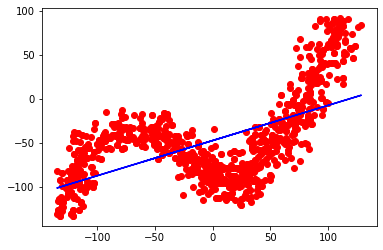

In [141]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

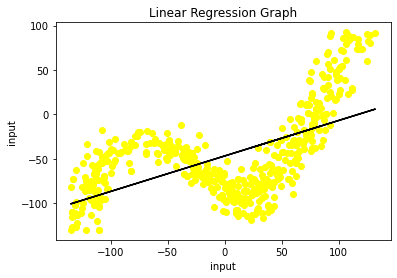

In [148]:
plt.scatter(X_test, y_test, color = 'yellow')
plt.plot(X_test, regressor.predict(X_test), color = 'black')
plt.title('Linear Regression Graph')
plt.xlabel('input')
plt.ylabel('input')
plt.show()

#### EVALUATION METRICS

In [158]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [165]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test,y_pred)
print("RSQUARE",r2)
n=40
k=2
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("ADJ R2",adj_r2_score)

MAE 33.15876374024833
MSE 1574.2119252127957
RMSE 39.67633961459645
RSQUARE 0.3470739425415794
ADJ R2 0.3117806421384215


In [161]:
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE 3.680755030545582
